## Imports

In [1]:
# Python standard library
import csv
import json
import datetime
import sys

# Scipy
import numpy as np
import sklearn.linear_model
import sklearn.model_selection
import pandas as pd

import matplotlib.pyplot as plt

# Jupyter
import IPython.display

# Program-specific
sys.path.append('../modules')
import constants
import functions

## Test rotations/reflections

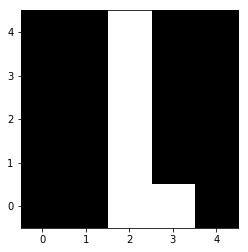

rotations


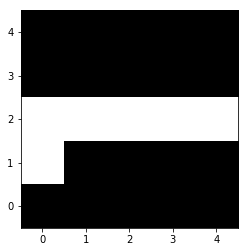

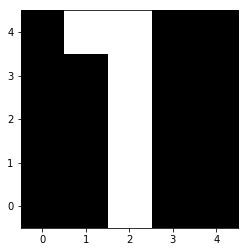

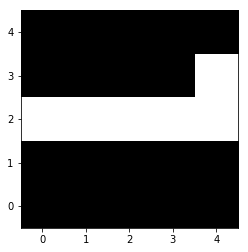

reflections


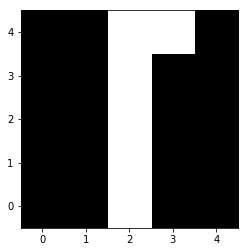

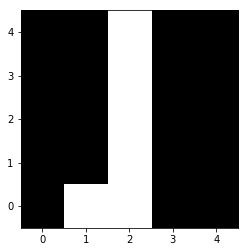

rotation/reflection


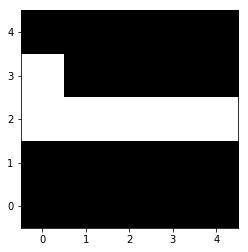

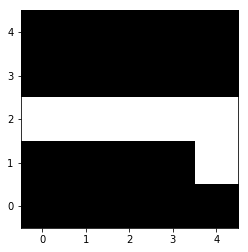

In [2]:
test = np.zeros((5,5))

test[:,2] = 1
test[0,3] = 1

plt.imshow(test, cmap = 'gray', origin = 'lower')
plt.show()



# Rotations
print('rotations')
for i in range(1,4):
    plt.imshow(np.rot90(test, i), cmap = 'gray', origin = 'lower')
    plt.show()

    
    
# Reflections
print('reflections')
plt.imshow(np.flip(test, 0), cmap = 'gray', origin = 'lower')
plt.show()

plt.imshow(np.flip(test, 1), cmap = 'gray', origin = 'lower')
plt.show()

# Rot/reflec
print('rotation/reflection')
plt.imshow(np.flip(np.rot90(test,1), axis = 0), cmap = 'gray', origin = 'lower')
plt.show()

plt.imshow(np.flip(np.rot90(test,3), axis = 0), cmap = 'gray', origin = 'lower')
plt.show()



## Load data set

In [3]:
df_train = functions.LoadTrainData(aug = False, mix = False)

/home/prestonh/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


## Test on iceberg-image

In [4]:
def PlotBands(band_1, band_2):
    fig, axes = plt.subplots(1,2,figsize = (8,4))
    
    fig.sca(axes[0])
    plt.imshow(band_1.reshape((constants.num_img_rows, constants.num_img_rows)), cmap = 'gray', origin = 'lower', interpolation = None)
    plt.xticks([])
    plt.yticks([])
    
    fig.sca(axes[1])
    plt.imshow(band_2.reshape((constants.num_img_rows, constants.num_img_rows)), cmap = 'gray', origin = 'lower', interpolation = None)
    plt.xticks([])
    plt.yticks([])
    
    
    plt.show()

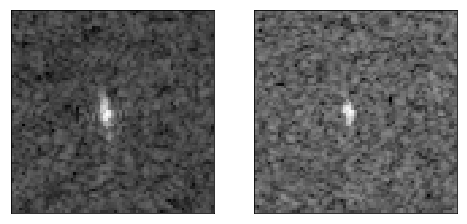

rotations


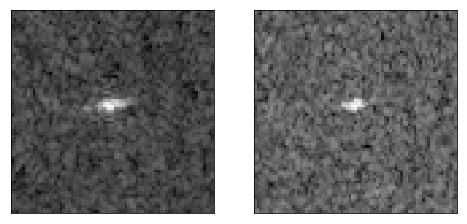

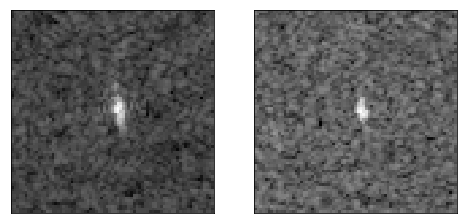

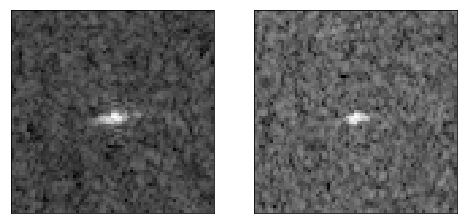

reflections


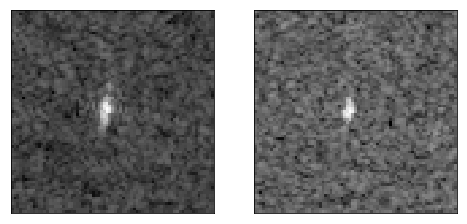

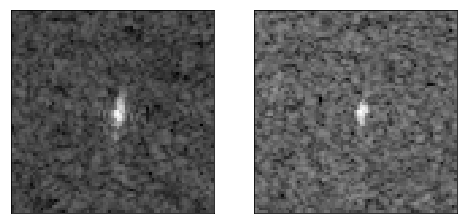

flips


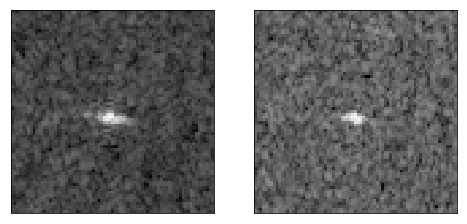

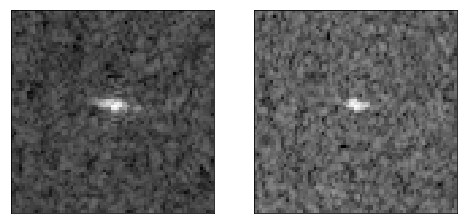

In [11]:
# Get sample
i = 0
row_data = df_train.iloc[i]

band_1 = row_data[[column for column in df_train.columns if 'band_1' in column]].values.astype(float)
band_2 = row_data[[column for column in df_train.columns if 'band_2' in column]].values.astype(float)

PlotBands(band_1.reshape((75,75)), band_2.reshape((75,75)))

# Rotations
print('rotations')
for j in range(1,4):
    new_band_1 = np.rot90(band_1.reshape((75,75)), j).flatten()
    new_band_2 = np.rot90(band_2.reshape((75,75)), j).flatten()
    
    PlotBands(new_band_1, new_band_2)



# Reflections
print('reflections')
new_band_1 = np.flip(band_1.reshape((75,75)), 0).flatten()
new_band_2 = np.flip(band_2.reshape((75,75)), 0).flatten()
PlotBands(new_band_1, new_band_2)


new_band_1 = np.flip(band_1.reshape((75,75)), 1).flatten()
new_band_2 = np.flip(band_2.reshape((75,75)), 1).flatten()
PlotBands(new_band_1, new_band_2)



# Flips
print('flips')
new_band_1 = np.flip(np.rot90(band_1.reshape((75,75)), 1), 0).flatten()
new_band_2 = np.flip(np.rot90(band_2.reshape((75,75)), 1), 0).flatten()
PlotBands(new_band_1, new_band_2)



new_band_1 = np.flip(np.rot90(band_1.reshape((75,75)), 3), 0).flatten()
new_band_2 = np.flip(np.rot90(band_2.reshape((75,75)), 3), 0).flatten()
PlotBands(new_band_1, new_band_2)

## Augment data

##### Add new 'band_3' which is a sum of band_1 and band_2

In [5]:
for band_element in [ele for ele in df_train.columns if 'band_1' in ele]:
    index = band_element.split('_')[-1]    
    df_train['band_3_' + index] = df_train['band_1_' + index] + df_train['band_2_' + index]

In [6]:
df_train.head()

,is_iceberg,inc_angle,band_1_0,band_1_1,band_1_2,band_1_3,band_1_4,band_1_5,band_1_6,band_1_7,...,band_3_5615,band_3_5616,band_3_5617,band_3_5618,band_3_5619,band_3_5620,band_3_5621,band_3_5622,band_3_5623,band_3_5624
id,,,,,,,,,,,,,,,,,,,,,
dfd5f913,0,43.9239,-27.878361,-27.154160,-28.668615,-29.537971,-29.092485,-32.834259,-32.190609,-29.538139,...,-61.135506,-62.848170,-62.848254,-64.566631,-63.384289,-59.106775,-58.191712,-57.324551,-56.554136,-57.364109
e25388fd,0,38.1562,-12.242375,-14.920305,-14.920363,-12.666336,-10.387527,-11.345262,-13.046976,-13.720695,...,-33.229730,-35.101269,-36.075506,-36.606967,-33.192915,-33.836726,-36.695302,-38.054028,-33.470208,-33.890382
58b2aaa0,1,45.2859,-24.603676,-24.603714,-24.871029,-23.152775,-21.532150,-21.349318,-19.411156,-22.304850,...,-57.045353,-55.974474,-52.406520,-50.023788,-48.531193,-48.553418,-46.554886,-46.008716,-48.241455,-50.879284
4cfc3a18,0,43.8306,-22.454607,-23.082819,-23.998013,-23.998053,-24.753868,-24.242828,-22.868555,-24.242914,...,-55.542353,-58.704578,-54.519472,-52.192785,-50.885012,-50.377218,-53.328100,-55.016371,-57.190762,-55.607220
271f93f4,0,35.6256,-26.006956,-23.164886,-23.164886,-26.891163,-25.731390,-23.793257,-22.770273,-23.578913,...,-52.498129,-54.177864,-58.869597,-56.291809,-49.202460,-49.755333,-48.042888,-51.507891,-53.950214,-50.680304


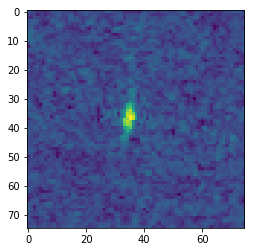

In [10]:
plt.imshow(df_train[[ele for ele in df_train.columns if 'band_3' in ele]].iloc[0].values.reshape((75,75)).astype(float))
plt.show()

##### Add on rotations and reflections

In [12]:
output_file_path = '../data/train/augmented/train_rotref.csv'
with open(output_file_path, 'w') as output_file_handle:
    output_file_writer = csv.writer(output_file_handle, delimiter = ',')
    
    
    
    output_file_writer.writerow(['id', 'is_iceberg', 'inc_angle'] + ['band_1_' + str(i) for i in range(75*75)] + ['band_2_' + str(i) for i in range(75*75)])

    
    for i in range(len(df_train)):
        
        row_data = df_train.iloc[i]

        id = row_data.name
        is_iceberg = row_data['is_iceberg']
        inc_angle = row_data['inc_angle']
        
        band_1 = row_data[[column for column in df_train.columns if 'band_1' in column]].values.astype(float)
        band_2 = row_data[[column for column in df_train.columns if 'band_2' in column]].values.astype(float)
        band_3 = row_data[[column for column in df_train.columns if 'band_3' in column]].values.astype(float)

        
        
        # Rotations
        for j in range(1,4):
            new_id = id + '_rot90-' + str(j)
            new_band_1 = np.rot90(band_1.reshape((75,75)), j).flatten()
            new_band_2 = np.rot90(band_2.reshape((75,75)), j).flatten()
            new_band_3 = np.rot90(band_3.reshape((75,75)), j).flatten()
            output_file_writer.writerow([new_id] + [is_iceberg] + [inc_angle] + list(new_band_1) + list(new_band_2) + list(new_band_3))
            
        # Reflections
        new_id = id + '_ref-0'
        new_band_1 = np.flip(band_1.reshape((75,75)), 0).flatten()
        new_band_2 = np.flip(band_2.reshape((75,75)), 0).flatten()
        new_band_3 = np.flip(band_3.reshape((75,75)), 0).flatten()

        output_file_writer.writerow([new_id] + [is_iceberg] + [inc_angle] + list(new_band_1) + list(new_band_2) + list(new_band_3))

        
        new_id = id + '_ref-1'
        new_band_1 = np.flip(band_1.reshape((75,75)), 1).flatten()
        new_band_2 = np.flip(band_2.reshape((75,75)), 1).flatten()
        new_band_3 = np.flip(band_3.reshape((75,75)), 1).flatten()

        output_file_writer.writerow([new_id] + [is_iceberg] + [inc_angle] + list(new_band_1) + list(new_band_2) + list(new_band_3))

        new_id = id + '_rot90-1_ref-0'
        new_band_1 = np.flip(np.rot90(band_1.reshape((75,75)), 1), 0).flatten()
        new_band_2 = np.flip(np.rot90(band_2.reshape((75,75)), 1), 0).flatten()
        new_band_3 = np.flip(np.rot90(band_3.reshape((75,75)), 1), 0).flatten()

        output_file_writer.writerow([new_id] + [is_iceberg] + [inc_angle] + list(new_band_1) + list(new_band_2) + list(new_band_3))
        
        new_id = id + '_rot90-3_ref-0'
        new_band_1 = np.flip(np.rot90(band_1.reshape((75,75)), 3), 0).flatten()
        new_band_2 = np.flip(np.rot90(band_2.reshape((75,75)), 3), 0).flatten()
        new_band_3 = np.flip(np.rot90(band_3.reshape((75,75)), 3), 0).flatten()

        output_file_writer.writerow([new_id] + [is_iceberg] + [inc_angle] + list(new_band_1) + list(new_band_2) + list(new_band_3))
        
        
        
            
            

## Test file

In [ ]:
with open(output_file_path, 'r') as file_handle:
    file_reader = csv.reader(file_handle, delimiter = ',')
    for i in range(2):
        print(next(file_reader))

## Test augmentations with logistic regression

In [ ]:
# Non-augmented
df = functions.LoadTrainData(aug = False, mix = True)





N_train = int(len(df)*0.8)
N_test = len(df) - N_train


df.loc[df['inc_angle'] == 'na', 'inc_angle'] = 0
df['inc_angle'] = df['inc_angle'].apply(pd.to_numeric)



inputs = constants.inputs
output = constants.output


model = sklearn.linear_model.LogisticRegression(C = 1)

model.fit(df[inputs][:N_train], df[output][:N_train])
print(model.score(df[inputs][N_train:], df[output][N_train:]))

In [ ]:
model = sklearn.linear_model.LogisticRegression(C = 1)

model.fit(df[inputs][:N_train], df[output][:N_train])
print(model.score(df[inputs][N_train:], df[output][N_train:]))

In [ ]:
# Non-augmented
df = functions.LoadTrainData(aug = True, mix = True)





N_train = int(len(df)*0.8)
N_test = len(df) - N_train


df.loc[df['inc_angle'] == 'na', 'inc_angle'] = 0
df['inc_angle'] = df['inc_angle'].apply(pd.to_numeric)



inputs = constants.inputs
output = constants.output


model = sklearn.linear_model.LogisticRegression(C = 1)

model.fit(df[inputs][:N_train], df[output][:N_train])
print(model.score(df[inputs][N_train:], df[output][N_train:]))